<a href="https://colab.research.google.com/github/zenitsu0705/DL/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Epoch 1/100
1/4 [======>.......................] - ETA: 3s - loss: 0.3480

4/4 [==============================] - 1s 97ms/step - loss: 0.3561 - val_loss: 0.2910
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.3133 - val_loss: 0.2515
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2749 - val_loss: 0.2163
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2417 - val_loss: 0.1840
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2089 - val_loss: 0.1560
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1801 - val_loss: 0.1309
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1555 - val_loss: 0.1087
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1321 - val_loss: 0.0894
Epoch 9/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1104 - val_loss: 0.0728
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0929 - val_loss: 0.0588
Epoch 11/100
4/4 [=============

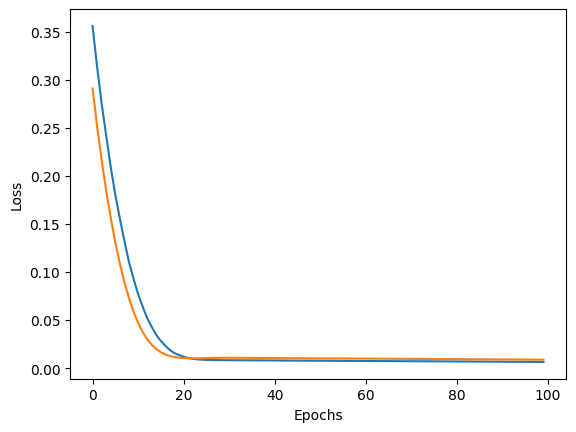

1/1 [==============================] - 0s 147ms/step


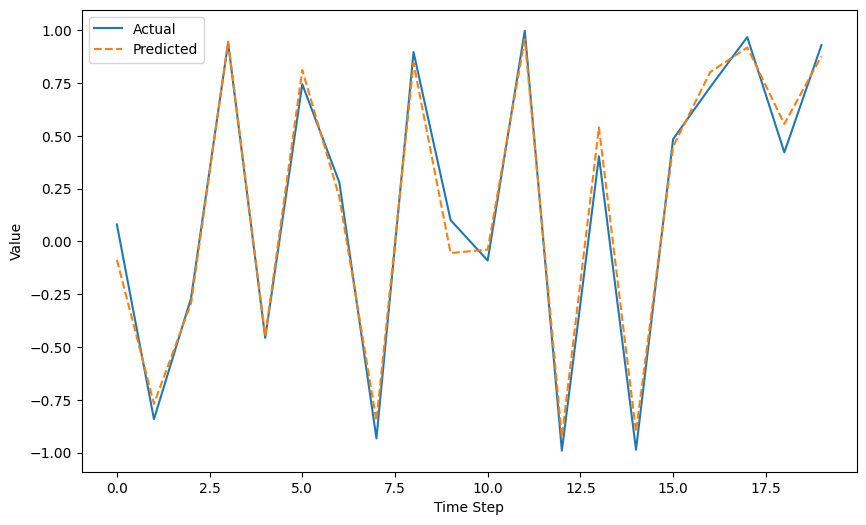

In [8]:
sequence_length = 100
timestamps = np.linspace(0, 10, sequence_length)
data = np.sin(timestamps)
X = []
Y = []
for i in range(sequence_length - 1):
  X.append(data[i:i+1])
  Y.append(data[i+1])

x = np.array(X)
y = np.array(Y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

predicted_values = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predicted_values, label='Predicted', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()